# Health Promotion Administration

In [1]:
import numpy as np
from utils import *

In [2]:
warnings.filterwarnings("ignore")  
os.getcwd()

'C:\\Users\\user\\Desktop\\for github'

# Read csv- CGRD

In [3]:
cgrd_2017 = pd.read_csv('data\\cgrd_2017.csv')
cgrd_2018 = pd.read_csv('data\\cgrd_2018.csv')
cgrd_2019 = pd.read_csv('data\\cgrd_2019.csv')

cgrd_2017.info()
cgrd_2018.info()
cgrd_2019.info()

cgrd_2017['year'] = 2017
cgrd_2018['year'] = 2018
cgrd_2019['year'] = 2019

cgrd_2017.tail(2)
cgrd_2018.tail(2)
cgrd_2019.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268005 entries, 0 to 268004
Columns: 114 entries, idcode to ICD_CODE
dtypes: float64(20), int64(66), object(28)
memory usage: 233.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271895 entries, 0 to 271894
Columns: 114 entries, idcode to ICD_CODE
dtypes: float64(20), int64(66), object(28)
memory usage: 236.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274233 entries, 0 to 274232
Columns: 114 entries, idcode to ICD_CODE
dtypes: float64(17), int64(66), object(31)
memory usage: 238.5+ MB


,idcode,breast,data_date,hosp,BC_n,bc_gp,FOBT,OC,birth_year,age,...,Colonscopy_past_date,Colorectal_cancer,CLNCDXDAT,CLNCDXDAT1,CAUSE,ICD,D_DATE,CAUSE_CNM,ICD_CODE,year
274231,FFFF83BC5D8EBA54B38CD37DDD2A6B1AC8311471,NaN,201912,1132070011,N,NaN,NaN,2017-08-08,1964,55,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
274232,FFFFAFA8D6A70AF762326FF3E6EBF5C5AEC56324,NaN,201909,1101010012,0,6.0,2017-03-02,NaN,1962,57,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [4]:
## concat 3 years
cgrd_3y = pd.concat([cgrd_2017, cgrd_2018, cgrd_2019]).reset_index(drop=True)
cgrd_3y.tail(2)

,idcode,breast,data_date,hosp,BC_n,bc_gp,FOBT,OC,birth_year,age,...,Colonscopy_past_date,Colorectal_cancer,CLNCDXDAT,CLNCDXDAT1,CAUSE,ICD,D_DATE,CAUSE_CNM,ICD_CODE,year
814131,FFFF83BC5D8EBA54B38CD37DDD2A6B1AC8311471,NaN,201912,1132070011,N,NaN,NaN,2017-08-08,1964,55,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
814132,FFFFAFA8D6A70AF762326FF3E6EBF5C5AEC56324,NaN,201909,1101010012,0,6.0,2017-03-02,NaN,1962,57,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


# Select columns

In [5]:
df_3y = pd.DataFrame()
df_3y['bc_gp'] = (cgrd_3y.bc_gp)
df_3y['age_gp'] = (cgrd_3y.age_gp)
df_3y['oc_gp'] = (cgrd_3y.oc_gp)
df_3y['pas_gp'] = (cgrd_3y.pas_gp)
df_3y['sex'] = (cgrd_3y.sex)
df_3y['year'] = (cgrd_3y.year)
df_3y['outcome_screen'] = (cgrd_3y.outcome_screen)

df_3y.tail(2)

,bc_gp,age_gp,oc_gp,pas_gp,sex,year,outcome_screen
814131,NaN,2,1,NaN,M,2019,0
814132,6.0,2,9,4.0,F,2019,0


# Split on sex

In [6]:
## male
df_3y_M = df_3y[df_3y.sex == 'M'].reset_index(drop=True)
del df_3y_M['sex']
del df_3y_M['bc_gp']
del df_3y_M['pas_gp']

df_3y_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357827 entries, 0 to 357826
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   age_gp          357827 non-null  int64
 1   oc_gp           357827 non-null  int64
 2   year            357827 non-null  int64
 3   outcome_screen  357827 non-null  int64
dtypes: int64(4)
memory usage: 10.9 MB


In [7]:
## female
df_3y_F = df_3y[df_3y.sex == 'F'].reset_index(drop=True)
del df_3y_F['sex']

df_3y_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456306 entries, 0 to 456305
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bc_gp           456306 non-null  float64
 1   age_gp          456306 non-null  int64  
 2   oc_gp           456306 non-null  int64  
 3   pas_gp          456306 non-null  float64
 4   year            456306 non-null  int64  
 5   outcome_screen  456306 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 20.9 MB


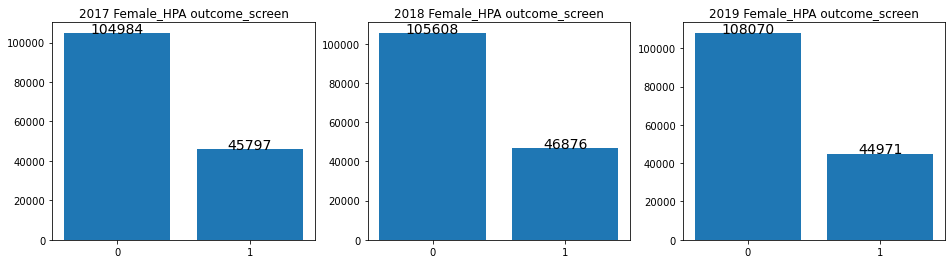

In [8]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(131)
ax1.bar(sorted(df_3y_F[df_3y_F.year == 2017].outcome_screen.unique()), 
        df_3y_F[df_3y_F.year == 2017].outcome_screen.value_counts(), tick_label=[0 , 1])
ax1.set_title('2017 Female_HPA outcome_screen')
for x,y in zip(sorted(df_3y_F[df_3y_F.year == 2017].outcome_screen.unique()), df_3y_F[df_3y_F.year == 2017].outcome_screen.value_counts()):
    ax1.text(x,y+0.05,y,fontsize=14,horizontalalignment='center')
    
ax2 = fig.add_subplot(132)
ax2.bar(sorted(df_3y_F[df_3y_F.year == 2018].outcome_screen.unique()), 
        df_3y_F[df_3y_F.year == 2018].outcome_screen.value_counts(), tick_label=[0 , 1])
ax2.set_title('2018 Female_HPA outcome_screen')
for x,y in zip(sorted(df_3y_F[df_3y_F.year == 2018].outcome_screen.unique()), df_3y_F[df_3y_F.year == 2018].outcome_screen.value_counts()):
    ax2.text(x,y+0.05,y,fontsize=14,horizontalalignment='center')

ax3 = fig.add_subplot(133)
ax3.bar(df_3y_F[df_3y_F.year == 2019].outcome_screen.unique(), 
        df_3y_F[df_3y_F.year == 2019].outcome_screen.value_counts(), tick_label=[0 , 1])
ax3.set_title('2019 Female_HPA outcome_screen')
for x,y in zip(df_3y_F[df_3y_F.year == 2019].outcome_screen.unique(), df_3y_F[df_3y_F.year == 2019].outcome_screen.value_counts()):
    ax3.text(x,y+0.05,y,fontsize=14,horizontalalignment='center')

plt.show()

# Correlation

In [9]:
df_3y_Fy = df_3y_F.iloc[:, :-2]
df_3y_Fy['outcome_screen  '] = df_3y_F.outcome_screen

df_3y_Fy.corr(method='spearman')

,bc_gp,age_gp,oc_gp,pas_gp,outcome_screen
bc_gp,1.000000,0.283959,0.085591,0.437091,-0.219845
age_gp,0.283959,1.000000,-0.015304,0.141871,0.036901
oc_gp,0.085591,-0.015304,1.000000,0.102484,-0.083792
pas_gp,0.437091,0.141871,0.102484,1.000000,-0.239786
outcome_screen,-0.219845,0.036901,-0.083792,-0.239786,1.000000


# Split to training/ valid/ test

In [10]:
X_train = df_3y_F[df_3y_F.year == 2017].iloc[:, :-2]
y_train = df_3y_F[df_3y_F.year == 2017].outcome_screen

X_valid = df_3y_F[df_3y_F.year == 2018].iloc[:, :-2]
y_valid = df_3y_F[df_3y_F.year == 2018].outcome_screen

X_test = df_3y_F[df_3y_F.year == 2019].iloc[:, :-2]
y_test = df_3y_F[df_3y_F.year == 2019].outcome_screen

# Model_XGBoost Classifier

In [11]:
start_time = time.time()

xgb = XGBClassifier()
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(xgboost.__version__)
print(cv)
print('XGBClassifier:', cv.mean())
print("--- %s seconds ---" % (time.time() - start_time))


[15:47:21] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:22] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:23] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:23] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

# Training

[15:47:25] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


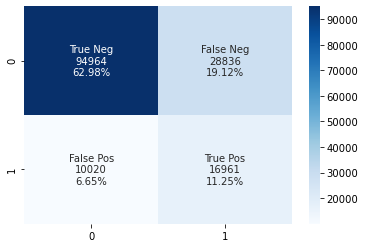

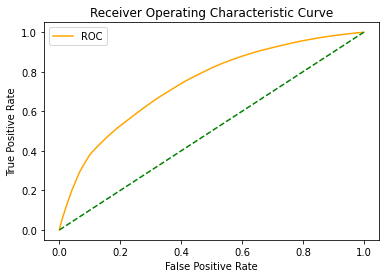

--------------- True/False Pos/Neg ---------------
            True Neg False Pos False Neg True Pos    AUC
F_HPA_train    94964     10020     28836    16961  0.637 

[15:47:26] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,F_HPA_column,F_train_impor
0,bc_gp,0.789834
3,pas_gp,0.145632
1,age_gp,0.045514
2,oc_gp,0.019020


In [12]:
train = confusio_matrix(xgb, X_train, y_train)
plot_roc_curve(xgb, X_train, y_train)

train = train.rename(index={0: "F_HPA_train"})
print('--------------- True/False Pos/Neg ---------------')
print(train, '\n')

train_imp = get_impotances(xgb, X_train, y_train)
train_imp.columns = ['F_HPA_column', 'F_train_impor']

train_imp

# Validation

[15:47:28] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


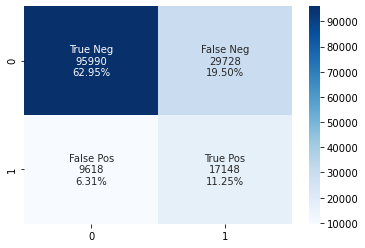

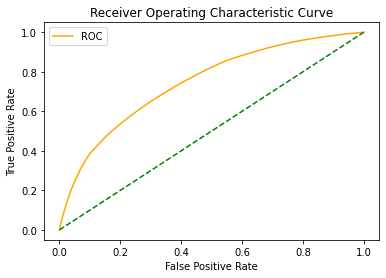

--------------- True/False Pos/Neg ---------------
            True Neg False Pos False Neg True Pos    AUC
F_HPA_valid    95990      9618     29728    17148  0.637 

[15:47:29] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,F_HPA_column,F_valid_impor
0,bc_gp,0.757231
3,pas_gp,0.174677
1,age_gp,0.051257
2,oc_gp,0.016835


In [13]:
valid = confusio_matrix(xgb, X_valid, y_valid)
plot_roc_curve(xgb, X_valid, y_valid)

valid = valid.rename(index={0: "F_HPA_valid"})
print('--------------- True/False Pos/Neg ---------------')
print(valid, '\n')

valid_imp = get_impotances(xgb, X_valid, y_valid)
valid_imp.columns = ['F_HPA_column', 'F_valid_impor']
valid_imp

# Test

[15:47:30] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


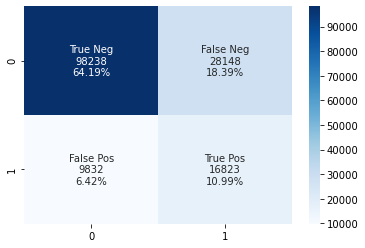

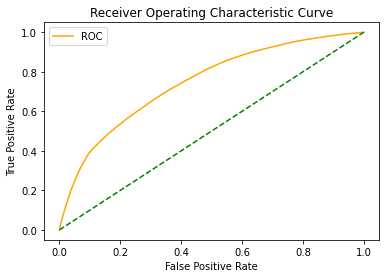

--------------- True/False Pos/Neg ---------------
           True Neg False Pos False Neg True Pos    AUC
F_HPA_test    98238      9832     28148    16823  0.642 

[15:47:32] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,F_HPA_column,F_test_impor
0,bc_gp,0.788143
3,pas_gp,0.149830
1,age_gp,0.045355
2,oc_gp,0.016672


In [14]:
test = confusio_matrix(xgb, X_test, y_test)
plot_roc_curve(xgb, X_test, y_test)

test = test.rename(index={0: "F_HPA_test"})
print('--------------- True/False Pos/Neg ---------------')
print(test, '\n')

test_imp = get_impotances(xgb, X_test, y_test)
test_imp.columns = ['F_HPA_column', 'F_test_impor']
test_imp

# Result

In [15]:
print('--- Female_HPA result---')
result = pd.concat([train, valid, test])
result 

--- Female_HPA result---


,True Neg,False Pos,False Neg,True Pos,AUC
F_HPA_train,94964,10020,28836,16961,0.637
F_HPA_valid,95990,9618,29728,17148,0.637
F_HPA_test,98238,9832,28148,16823,0.642


In [16]:
result1 = train_imp.merge(valid_imp, left_on='F_HPA_column', right_on='F_HPA_column')
result1 = result1.merge(test_imp, left_on='F_HPA_column', right_on='F_HPA_column')
result1

,F_HPA_column,F_train_impor,F_valid_impor,F_test_impor
0,bc_gp,0.789834,0.757231,0.788143
1,pas_gp,0.145632,0.174677,0.149830
2,age_gp,0.045514,0.051257,0.045355
3,oc_gp,0.019020,0.016835,0.016672
